Histograms! I think this notebook can be the foundation to many further analyses.

In [2]:
import pandas as pd
import matplotlib.pyplot as pl
import matplotlib.mlab as mlab
import math
import numpy as np

%matplotlib inline

data = pd.read_csv(r'C:\Users\angel\OneDrive\Documents\data_training\data\RawDelData.csv')
ylabel = 'Percentage of Orders'
xlabel = 'Tip in $'

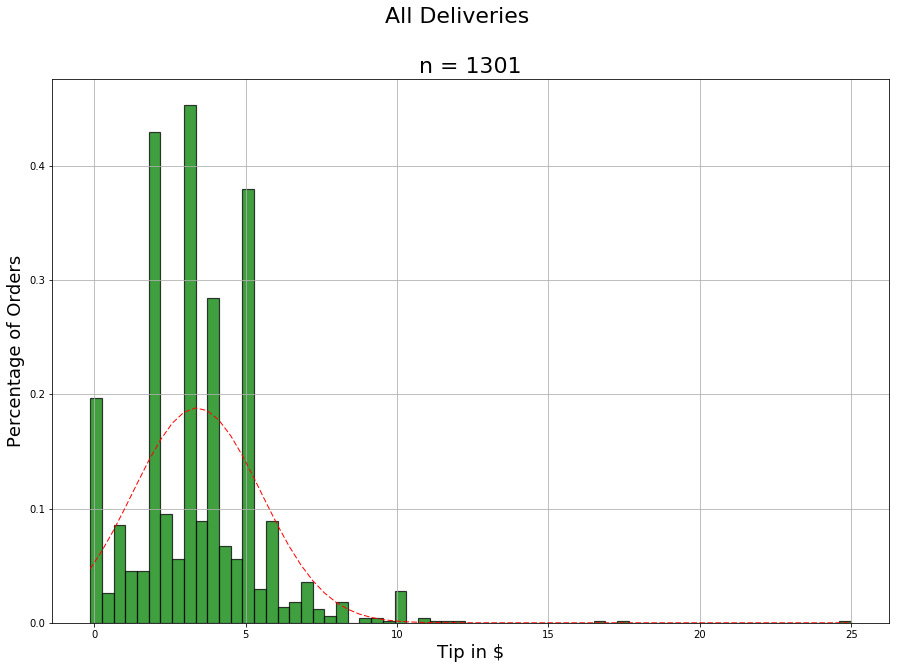

In [25]:
def create_hist(df, title_name):
    x = df.Tip
    n = len(df)
    bin_width = create_bin_width(df)    #two function calls to make the code a bit more modular and easier to use 
                                        #when creating multiple histograms on the same axes.
    bin_num = create_bin_num(df, bin_width)
    sigma = df.Tip.std()
    mu = df.Tip.mean()
    n, bins, patches = pl.hist(x, bin_num, normed=1, facecolor='green', alpha=0.75, edgecolor='black',linewidth=1.2)
    # add a 'best fit' line
    y = mlab.normpdf( bins, mu, sigma)
    l = pl.plot(bins, y, 'r--', linewidth=1)
    pl.grid(True)
    
    n = len(df)
    pl.suptitle(title_name, fontsize=22)
    pl.title('n = %s' %n, fontsize=22)
    pl.ylabel(ylabel, fontsize=18)
    pl.xlabel(xlabel, fontsize=18)
    pl.rcParams['figure.figsize'] = (15, 10)
    pl.show()
    
def create_bin_width(df):
    x = df.Tip
    n = len(df)
    '''The Freedman-Diaconis rule is very robust and works well in practice. 
    The bin-width is set to max-min/h
    where: h = 2∗IQR∗n^(−1/3)'''
    q75, q25 = np.percentile(x, [75 ,25])
    iqr = q75 - q25
    h = 2*iqr*n**(1.0/3)
    range = x.max() - x.min()
    bin_width = range/h
    return bin_width

def create_bin_num(df, bin_width):
    x = df.Tip
    range = x.max() - x.min()
    bin_num = math.floor(range/bin_width)
    return bin_num

create_hist(data, "All Deliveries")

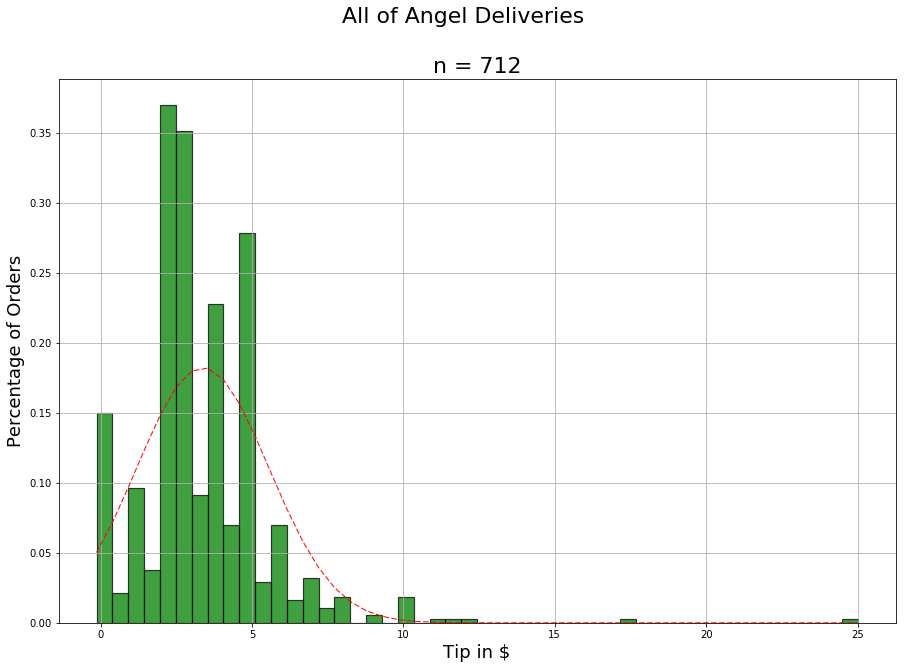

In [5]:
angel_tip = data.loc[data['PersonWhoDelivered']=='Angel']
create_hist(angel_tip, 'All of Angel Deliveries')

We can already see a difference in distributions in the following histogram. A higher percentage of tips in the 0 bucket but also the 5 dollar bucket, which is seemingly counter to the corresponding standard deviations: 

Angel stdev: 2.1848
Sammie stdev: 2.0408

Which I calculated in https://github.com/angelddaz/pizza_delivery/blob/master/Jupyter%20Notebooks/002pizza_gender_tipping.ipynb
my second jupyter notebook in this series.

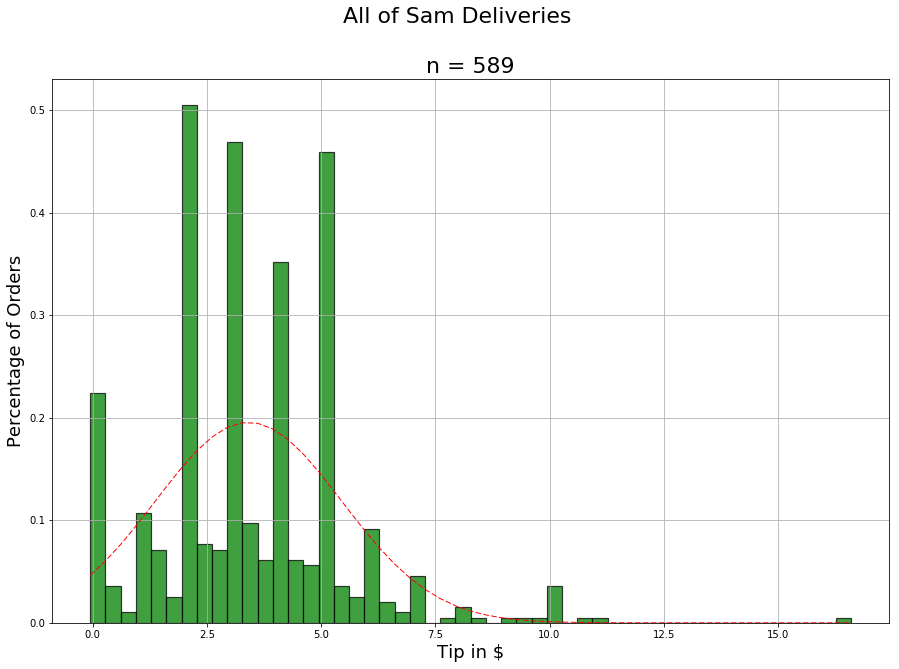

In [6]:
sam_tip = data.loc[data['PersonWhoDelivered']=='Sammie']
create_hist(sam_tip, 'All of Sam Deliveries')

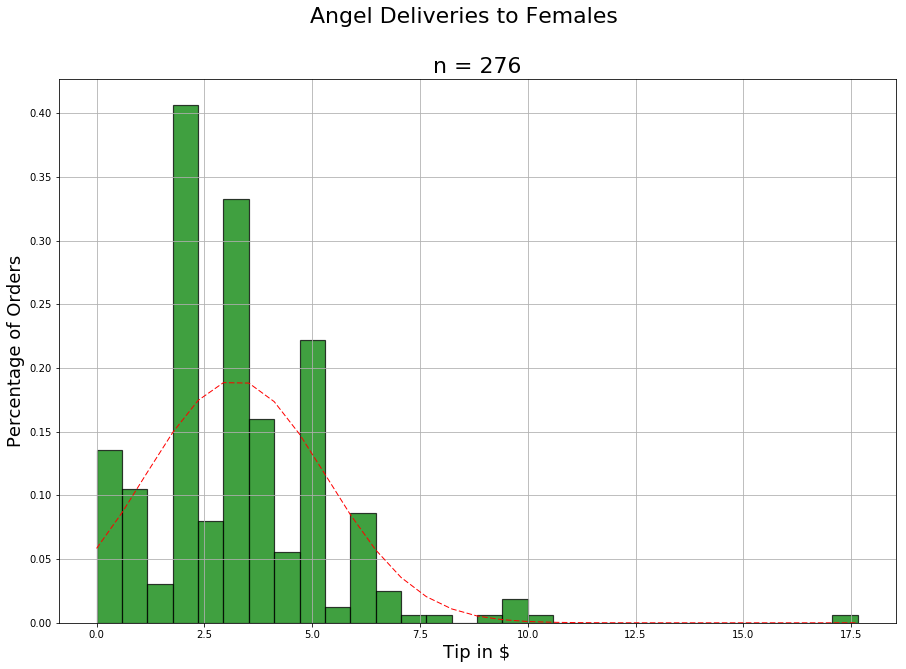

In [7]:
angel_female = angel_tip.loc[angel_tip['GenderOfTipper'] == 'Female']
create_hist(angel_female, 'Angel Deliveries to Females')

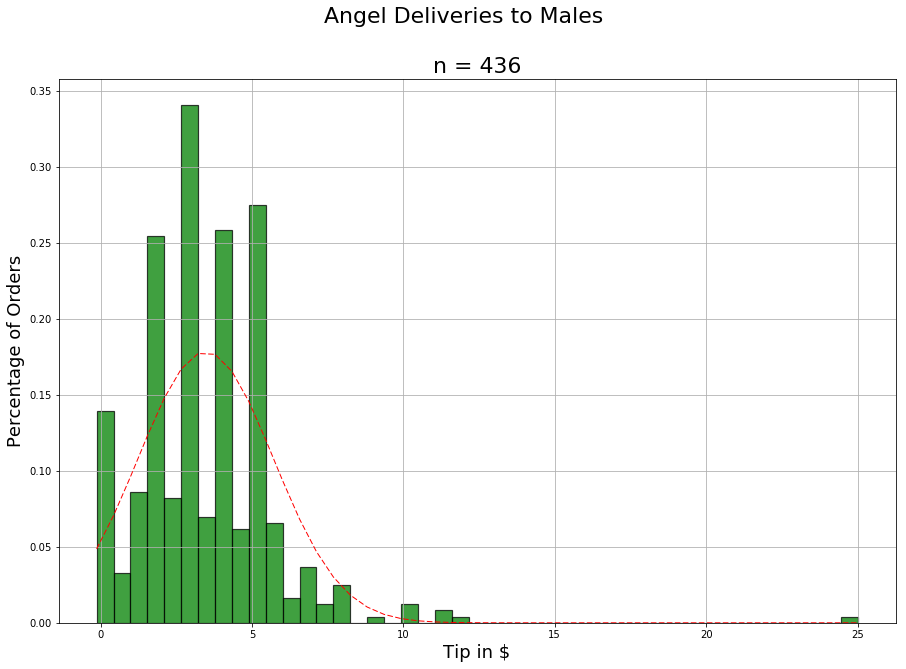

In [8]:
angel_male = angel_tip.loc[angel_tip['GenderOfTipper'] == 'Male']
create_hist(angel_male, 'Angel Deliveries to Males')

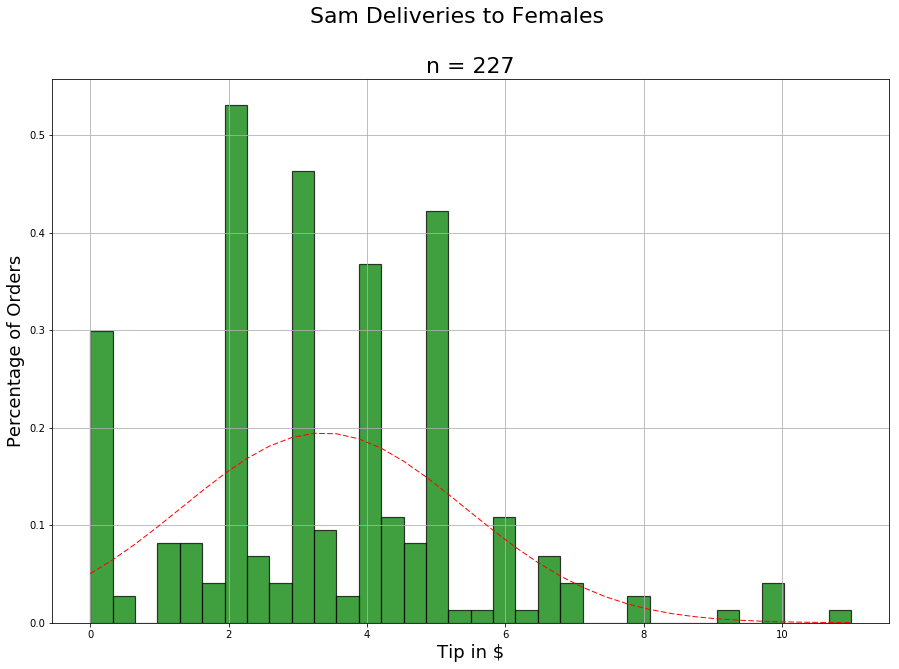

In [9]:
sam_female = sam_tip.loc[sam_tip['GenderOfTipper'] == 'Female']
create_hist(sam_female, 'Sam Deliveries to Females')\
#beware of changing x axes limits

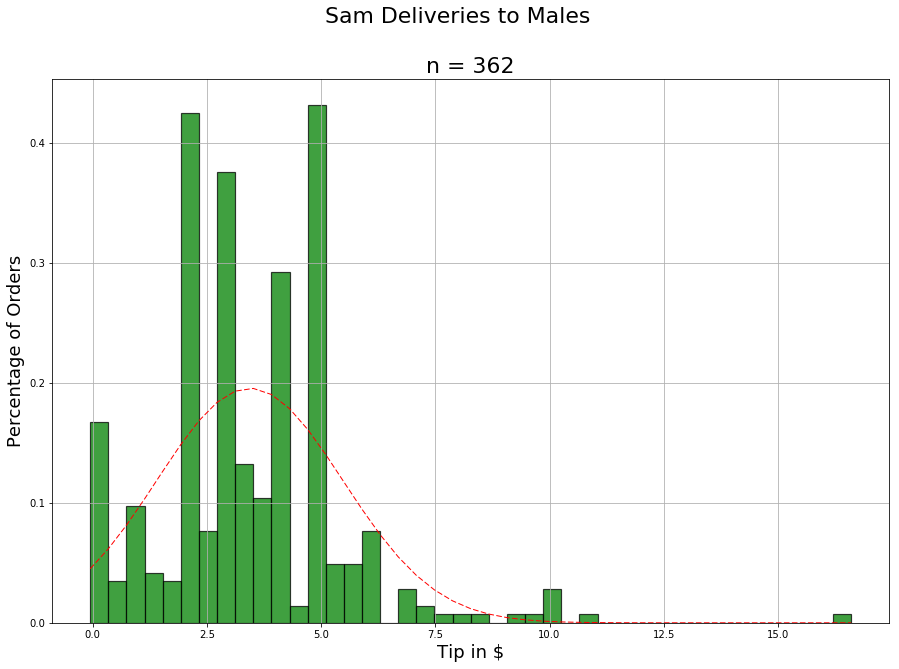

In [10]:
sam_male = sam_tip.loc[sam_tip['GenderOfTipper'] == 'Male']
create_hist(sam_male, 'Sam Deliveries to Males')

Now time for histograms over histograms to compare distributions a bit better.

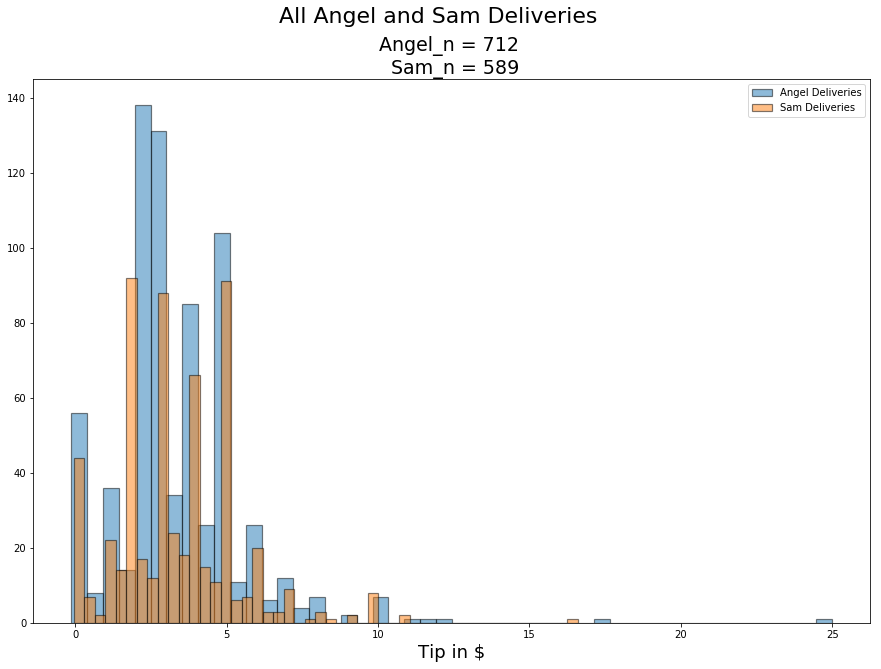

Overall Proportion of Delivery count is : 0.827247191011 Sam deliveries for every one Angel Delivery


In [22]:
df_x = angel_tip
df_y = sam_tip
x_bin_width = create_bin_width(df_x)
y_bin_width = x_bin_width #create_bin_width(df_y) #same bin widths
x_bin_num = create_bin_num(df_x, x_bin_width) #Different bin widths, I'm not sure if this is the way to do it
y_bin_num = x_bin_num #create_bin_num(df_y, y_bin_width) #same bin numbers

df_x = angel_tip.Tip #re-instantiating these variables because the two functions I created change them
df_y = sam_tip.Tip   #Maybe not the most efficient method.
pl.hist(df_x, x_bin_num, alpha=0.5, label='Angel Deliveries', edgecolor='black',linewidth=1.2)
pl.hist(df_y, y_bin_num, alpha=0.5, label='Sam Deliveries', edgecolor='black',linewidth=1.2)
pl.legend(loc='best')
angel_n = len(angel_tip)
sam_n = len(sam_tip)

pl.suptitle("All Angel and Sam Deliveries", fontsize=22)
pl.title('Angel_n = %d \n Sam_n = %d'% (angel_n, sam_n), fontsize=19)
pl.xlabel(xlabel, fontsize=18)
pl.rcParams['figure.figsize'] = (15, 10)
pl.show()

angel_n = angel_n * 1.0
p = sam_n / angel_n
print ("Overall Proportion of Delivery count is : %s Sam deliveries for every one Angel Delivery" %p)

If this proportion were to hold evenly throughout, there wouldn't be these (seemingly) proportionally different number of deliveries in these histogram bins. 

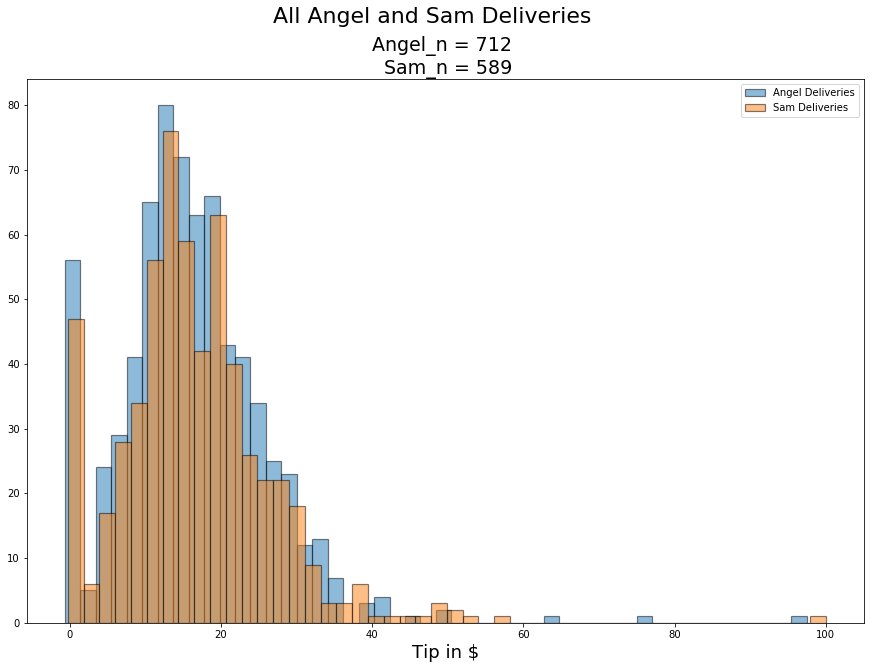

In [26]:
df_x = angel_tip
df_y = sam_tip
x_bin_width = create_bin_width(df_x)
y_bin_width = x_bin_width #create_bin_width(df_y) #same bin widths
x_bin_num = create_bin_num(df_x, x_bin_width) #Different bin widths, I'm not sure if this is the way to do it
y_bin_num = x_bin_num #create_bin_num(df_y, y_bin_width) #same bin numbers

df_x = angel_tip.TipPercent #re-instantiating these variables because the two functions I created change them
df_y = sam_tip.TipPercent   #Maybe not the most efficient method.
pl.hist(df_x, x_bin_num, alpha=0.5, label='Angel Deliveries', edgecolor='black',linewidth=1.2)
pl.hist(df_y, y_bin_num, alpha=0.5, label='Sam Deliveries', edgecolor='black',linewidth=1.2)
pl.legend(loc='best')
angel_n = len(angel_tip)
sam_n = len(sam_tip)

pl.suptitle("All Angel and Sam Deliveries", fontsize=22)
pl.title('Angel_n = %d \n Sam_n = %d'% (angel_n, sam_n), fontsize=19)
pl.xlabel(xlabel, fontsize=18)
pl.rcParams['figure.figsize'] = (15, 10)
pl.show()